In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

In [2]:
df= pd.read_csv("house-data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

data is clean 

In [4]:
#exploring bedrooms column 
df.bedrooms.value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

In [5]:
#exploring bathroom column
df.bathrooms.value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64

bathroom column has float values so i round this column

In [6]:
df['bathrooms']=df['bathrooms'].astype(int)

In [7]:
df.bathrooms.value_counts()

2    2311
1    1666
3     502
4      82
0      19
5      15
6       4
8       1
Name: bathrooms, dtype: int64

In [8]:
#exploring floors values
df.floors.value_counts()

1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64

floors column has float values so i round this column

In [9]:
df['floors']=df['floors'].astype(int)

In [10]:
df.floors.value_counts()

1    2618
2    1852
3     130
Name: floors, dtype: int64

In [11]:
df.country.value_counts()

USA    4600
Name: country, dtype: int64

all houses are in USA

In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


there is some rows that has 0 price value ,i will delete these rows


In [13]:
df.drop(df[df['price'] == 0.0].index, inplace=True)

In [14]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,1.782905,2132.372226,1.483528e+04,1.459240,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.744431,955.949708,3.596408e+04,0.552355,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.000000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.000000,1970.000000,7.680000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.000000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [15]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


### Visualization

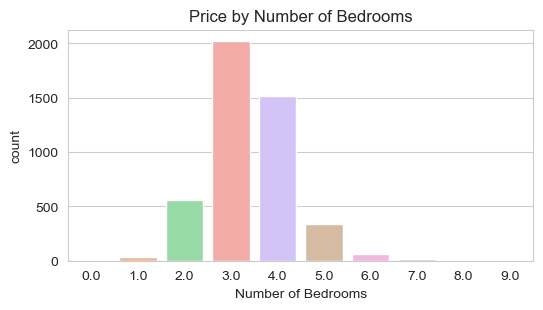

In [74]:
sns.set_style('whitegrid')

# Increase the size of the plot
plt.figure(figsize=(6,3))

# Customize the color palette
colors = sns.color_palette('pastel', len(df['bedrooms']))

# Plot the barplot
sns.countplot(x='bedrooms', data=df, palette=colors)

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('count')
plt.title('Price by Number of Bedrooms')

plt.show()

most of houses in this dataset is a 3 bedroom apartment

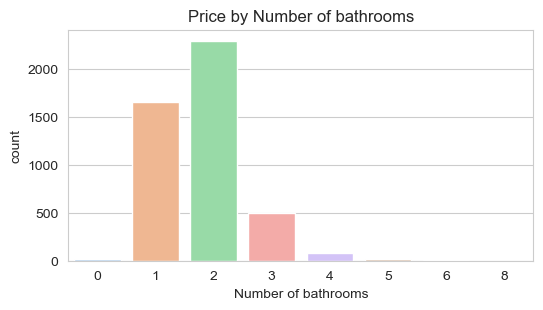

In [73]:
sns.set_style('whitegrid')

# Increase the size of the plot
plt.figure(figsize=(6,3))

# Customize the color palette
colors = sns.color_palette('pastel', len(df['bathrooms']))

# Plot the barplot
sns.countplot(x='bathrooms', data=df, palette=colors)

# Add labels and title
plt.xlabel('Number of bathrooms')
plt.ylabel('count')
plt.title('Price by Number of bathrooms')

plt.show()

most houses has 2 bathrooms

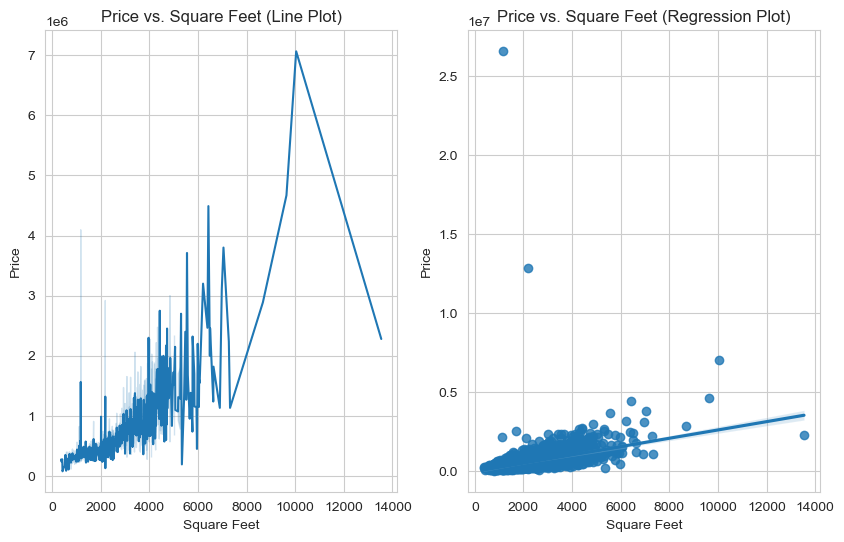

In [18]:
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

# Plot the line plot on the first subplot
sns.lineplot(x='sqft_living', y='price', data=df, ax=ax1)
ax1.set_xlabel('Square Feet')
ax1.set_ylabel('Price')
ax1.set_title('Price vs. Square Feet (Line Plot)')

# Plot the regression plot on the second subplot
sns.regplot(x='sqft_living', y='price', data=df, ax=ax2)
ax2.set_xlabel('Square Feet')
ax2.set_ylabel('Price')
ax2.set_title('Price vs. Square Feet (Regression Plot)')

plt.show()

the size of houses are bet (500 sqft to 6000sqft)

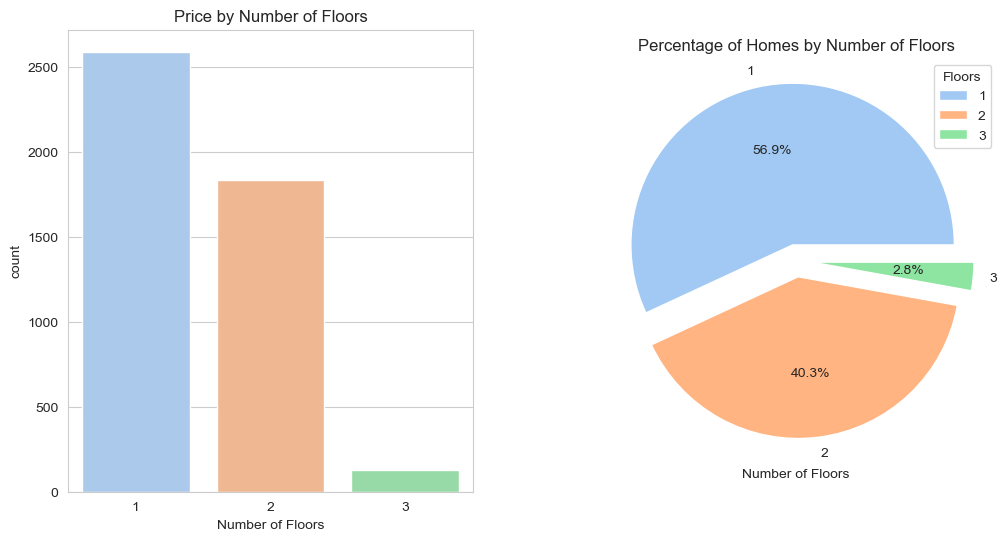

In [75]:

# Set the style of the plot
sns.set_style('whitegrid')

# Define the color palette
colors = sns.color_palette('pastel', n_colors=len(df['floors'].unique()))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the bar chart on the first subplot
sns.countplot(x='floors', data=df, palette=colors, ax=ax1)
ax1.set_xlabel('Number of Floors')
ax1.set_ylabel('count')
ax1.set_title('Price by Number of Floors')

# Plot the pie chart on the second subplot
floors_counts = df['floors'].value_counts()
explode = (0.1, 0.1, 0.1) # Explode first 3 slices
ax2.pie(floors_counts, labels=floors_counts.index, explode=explode, autopct='%1.1f%%', colors=colors)
ax2.set_xlabel('Number of Floors')
ax2.set_ylabel('')
ax2.set_title('Percentage of Homes by Number of Floors')

# Add a legend to the pie chart
ax2.legend(title='Floors', loc='upper right', labels=[1, 2, 3])

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

distribution of floors in data 

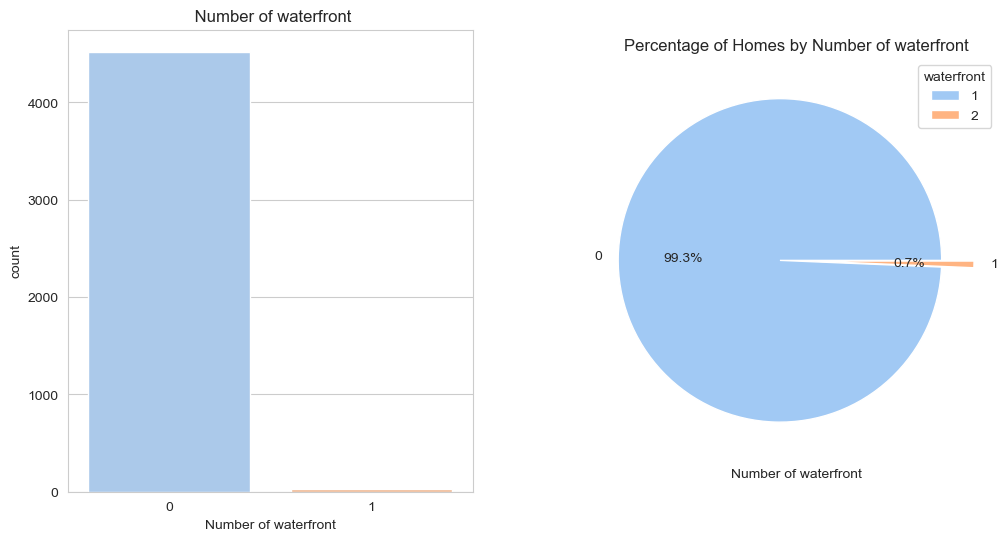

In [76]:
# Set the style of the plot
sns.set_style('whitegrid')

# Define the color palette
colors = sns.color_palette('pastel', n_colors=len(df['waterfront'].unique()))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the bar chart on the first subplot
sns.countplot(x='waterfront', data=df, palette=colors, ax=ax1)
ax1.set_xlabel('Number of waterfront')
ax1.set_ylabel('count')
ax1.set_title(' Number of waterfront')

# Plot the pie chart on the second subplot
waterfront_counts = df['waterfront'].value_counts()
explode = (0.1, 0.1) # Explode first 2 slices
ax2.pie(waterfront_counts, labels=waterfront_counts.index, explode=explode, autopct='%1.1f%%', colors=colors)
ax2.set_xlabel('Number of waterfront')
ax2.set_ylabel('')
ax2.set_title('Percentage of Homes by Number of waterfront')

# Add a legend to the pie chart
ax2.legend(title='waterfront', loc='upper right', labels=[1, 2])

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

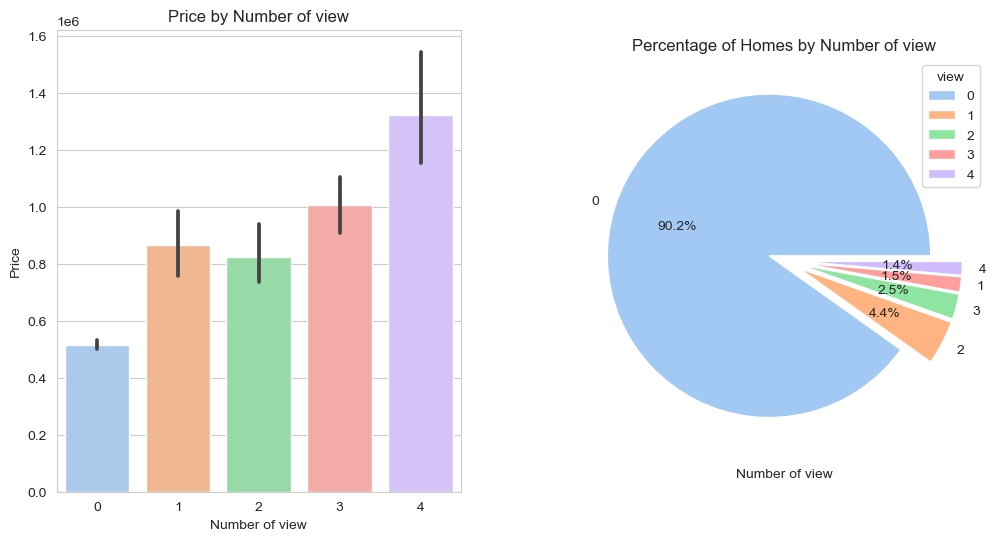

In [21]:
# Set the style of the plot
sns.set_style('whitegrid')

# Define the color palette
colors = sns.color_palette('pastel', n_colors=len(df['view'].unique()))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the bar chart on the first subplot
sns.barplot(x='view', y='price', data=df, palette=colors, ax=ax1)
ax1.set_xlabel('Number of view')
ax1.set_ylabel('Price')
ax1.set_title('Price by Number of view')

# Plot the pie chart on the second subplot
view_counts = df['view'].value_counts()
explode = (0.1, 0.1, 0.1, 0.1, 0.1) # Explode first 5 slices
ax2.pie(view_counts, labels=view_counts.index, explode=explode, autopct='%1.1f%%', colors=colors)
ax2.set_xlabel('Number of view')
ax2.set_ylabel('')
ax2.set_title('Percentage of Homes by Number of view')

# Add a legend to the pie chart
ax2.legend(title='view', loc='upper right', labels=[0,1,2,3,4,5])

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

In [22]:
df.condition.value_counts()

3    2851
4    1238
5     425
2      31
1       6
Name: condition, dtype: int64

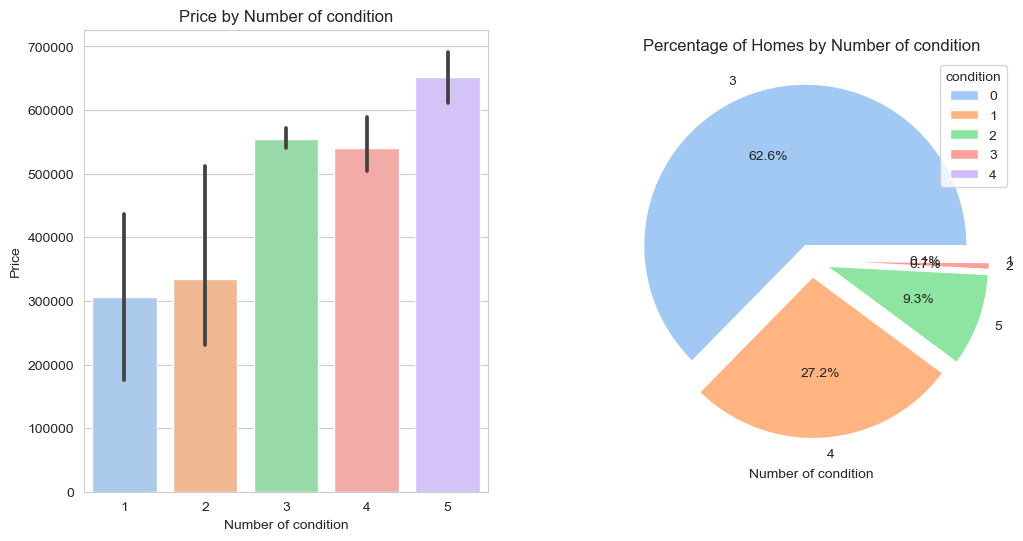

In [23]:
# Set the style of the plot
sns.set_style('whitegrid')

# Define the color palette
colors = sns.color_palette('pastel', n_colors=len(df['condition'].unique()))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the bar chart on the first subplot
sns.barplot(x='condition', y='price', data=df, palette=colors, ax=ax1)
ax1.set_xlabel('Number of condition')
ax1.set_ylabel('Price')
ax1.set_title('Price by Number of condition')

# Plot the pie chart on the second subplot
condition_counts = df['condition'].value_counts()
explode = (0.1, 0.1, 0.1, 0.1, 0.1) # Explode first 5 slices
ax2.pie(condition_counts, labels=condition_counts.index, explode=explode, autopct='%1.1f%%', colors=colors)
ax2.set_xlabel('Number of condition')
ax2.set_ylabel('')
ax2.set_title('Percentage of Homes by Number of condition')

# Add a legend to the pie chart
ax2.legend(title='condition', loc='upper right', labels=[0,1,2,3,4,5])

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

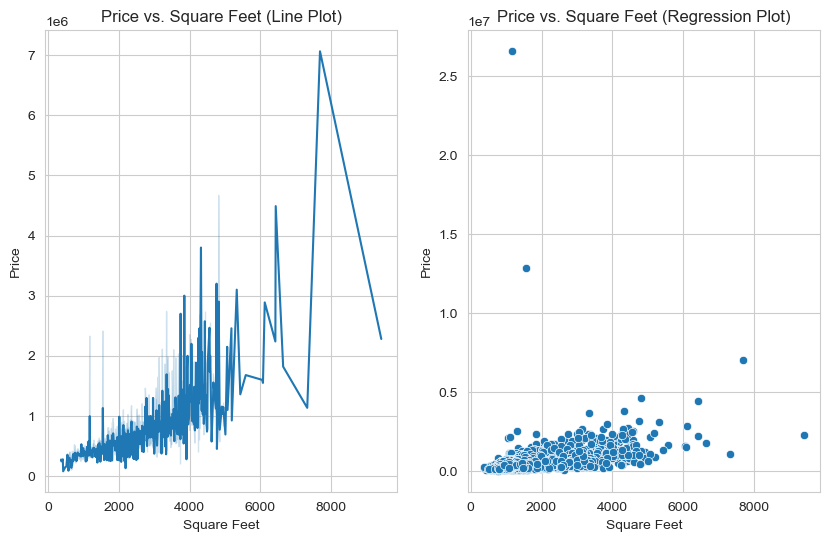

In [24]:
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

# Plot the line plot on the first subplot
sns.lineplot(x='sqft_above', y='price', data=df, ax=ax1)
ax1.set_xlabel('Square Feet')
ax1.set_ylabel('Price')
ax1.set_title('Price vs. Square Feet (Line Plot)')

# Plot the regression plot on the second subplot
sns.scatterplot(x='sqft_above', y='price', data=df, ax=ax2)
ax2.set_xlabel('Square Feet')
ax2.set_ylabel('Price')
ax2.set_title('Price vs. Square Feet (Regression Plot)')

plt.show()

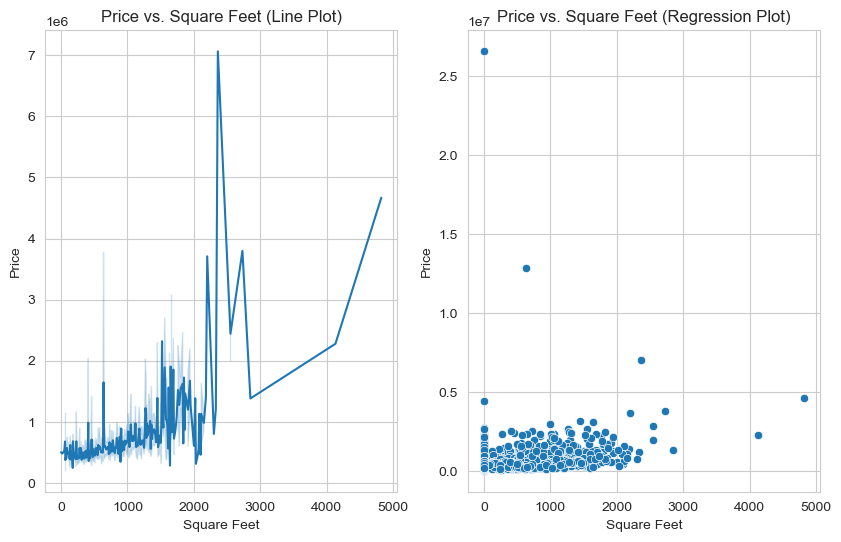

In [25]:
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

# Plot the line plot on the first subplot
sns.lineplot(x='sqft_basement', y='price', data=df, ax=ax1)
ax1.set_xlabel('Square Feet')
ax1.set_ylabel('Price')
ax1.set_title('Price vs. Square Feet (Line Plot)')

# Plot the regression plot on the second subplot
sns.scatterplot(x='sqft_basement', y='price', data=df, ax=ax2)
ax2.set_xlabel('Square Feet')
ax2.set_ylabel('Price')
ax2.set_title('Price vs. Square Feet (Regression Plot)')

plt.show()

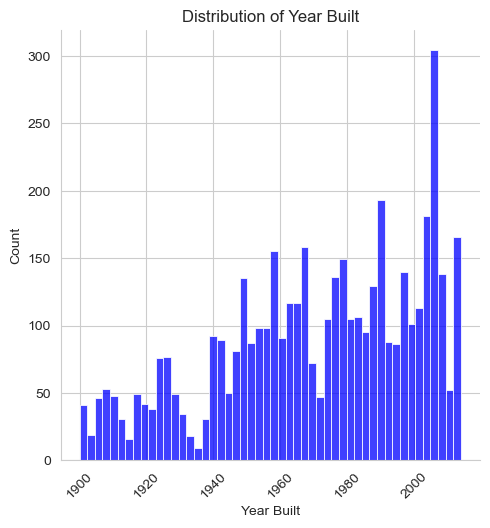

In [26]:
# Create a histogram with Seaborn
sns.displot(x='yr_built', data=df, kde=False, bins=50, color='blue')

# Customize the plot
plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.xticks(rotation=45)
sns.despine()

# Show the plot
plt.show()

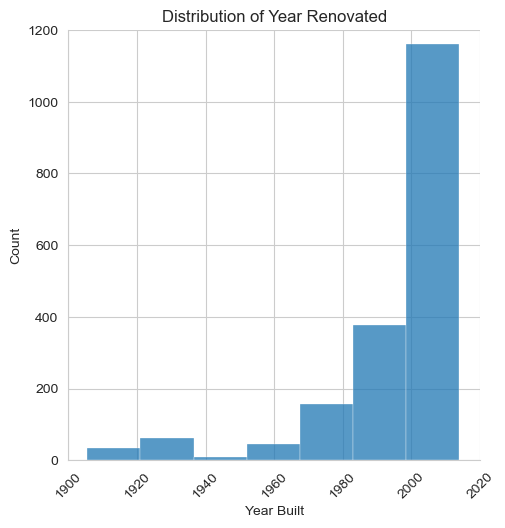

In [27]:
sns.displot(x='yr_renovated', data=df, bins=130)

# Customize the plot
plt.title("Distribution of Year Renovated")
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlim(left=1900,right=2020)  # Set the lower limit of the x-axis to 1900
plt.ylim(top=1200)  # Set the lower limit of the y-axis to 1200

sns.despine()

# Show the plot
plt.show()

In [28]:
df['yr_bef_renovated']=df.yr_renovated-df.yr_built
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_bef_renovated
0,2014-05-02 00:00:00,313000.0,3.0,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,50


In [29]:
df.yr_bef_renovated.describe()

count    4551.000000
mean    -1162.231597
std       989.433122
min     -2014.000000
25%     -1991.000000
50%     -1948.000000
75%        31.500000
max       114.000000
Name: yr_bef_renovated, dtype: float64

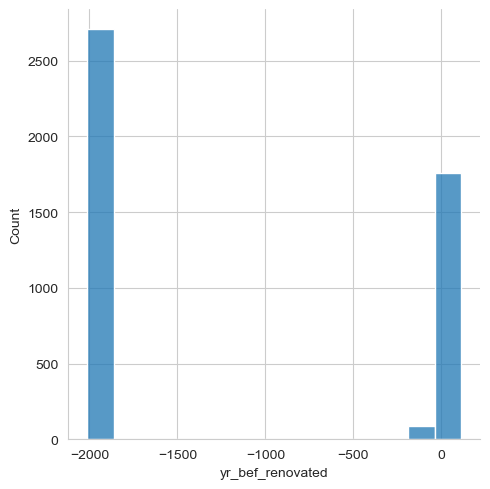

In [30]:
sns.displot(x='yr_bef_renovated',data=df)

In [31]:
df.yr_bef_renovated

0         50
1      -1921
2      -1966
3      -1963
4         16
        ... 
4595      25
4596      26
4597   -2009
4598   -1974
4599   -1990
Name: yr_bef_renovated, Length: 4551, dtype: int64

In [32]:
df[['yr_bef_renovated','yr_built','yr_renovated']]

,yr_bef_renovated,yr_built,yr_renovated
0,50,1955,2005
1,-1921,1921,0
2,-1966,1966,0
3,-1963,1963,0
4,16,1976,1992
...,...,...,...
4595,25,1954,1979
4596,26,1983,2009
4597,-2009,2009,0
4598,-1974,1974,0


In [33]:
df['yr_bef_renovated'] = df['yr_bef_renovated'].apply(lambda x: 0 if x < 0 else x)

In [34]:
df[['yr_bef_renovated','yr_built','yr_renovated']]

,yr_bef_renovated,yr_built,yr_renovated
0,50,1955,2005
1,0,1921,0
2,0,1966,0
3,0,1963,0
4,16,1976,1992
...,...,...,...
4595,25,1954,1979
4596,26,1983,2009
4597,0,2009,0
4598,0,1974,0


In [35]:
df.yr_bef_renovated.describe()

count    4551.000000
mean       16.147001
std        25.324577
min         0.000000
25%         0.000000
50%         0.000000
75%        31.500000
max       114.000000
Name: yr_bef_renovated, dtype: float64

<Axes: xlabel='yr_bef_renovated'>

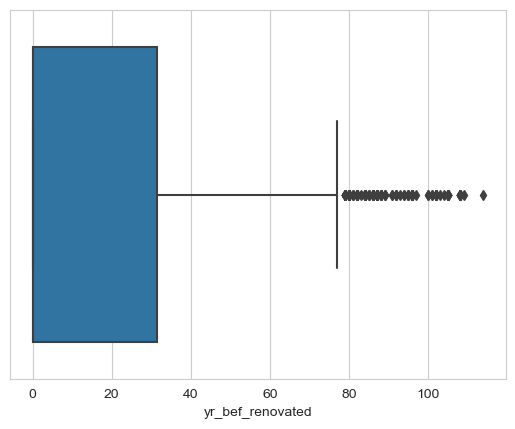

In [36]:
sns.boxplot(x='yr_bef_renovated',data=df)

In [37]:
len(df.yr_bef_renovated)

4551

In [38]:
len(df[df.yr_bef_renovated<20])

3143

In [39]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_bef_renovated
0,2014-05-02 00:00:00,313000.0,3.0,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,50
1,2014-05-02 00:00:00,2384000.0,5.0,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,0


In [40]:
df[(df.yr_bef_renovated<20) & (df.yr_bef_renovated!=0)].describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,yr_bef_renovated
count,2.440000e+02,244.000000,244.000000,244.000000,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,5.455378e+05,3.450820,1.934426,2397.946721,21897.209016,1.647541,0.0,0.192623,3.237705,2158.028689,239.918033,1984.893443,1998.385246,13.491803
std,2.707933e+05,0.732575,0.591263,812.083517,50227.304658,0.495613,0.0,0.672648,0.480967,790.635398,420.000972,14.856963,14.146469,3.739998
min,1.680000e+05,0.000000,0.000000,930.000000,1758.000000,1.000000,0.0,0.000000,3.000000,800.000000,0.000000,1919.000000,1934.000000,8.000000
25%,3.312958e+05,3.000000,2.000000,1847.500000,7344.250000,1.000000,0.0,0.000000,3.000000,1587.500000,0.000000,1987.000000,2000.000000,12.000000
50%,5.215000e+05,3.000000,2.000000,2260.000000,9431.500000,2.000000,0.0,0.000000,3.000000,2040.000000,0.000000,1988.000000,2000.000000,13.000000
75%,6.650000e+05,4.000000,2.000000,2712.500000,14918.500000,2.000000,0.0,0.000000,3.000000,2610.000000,512.500000,1990.000000,2006.000000,16.000000
max,1.728000e+06,6.000000,4.000000,5584.000000,641203.000000,3.000000,0.0,4.000000,5.000000,5584.000000,1850.000000,1998.000000,2009.000000,19.000000


In [41]:
len(df[(df.yr_bef_renovated<20) & (df.yr_bef_renovated!=0)])


244